# <center>Organizaci&oacute;n de Datos</center>
#### <center>C&aacute;tedra Ing. Rodriguez, Juan Manuel </center>

## <center>Trabajo Práctico 1 : Propiedades en Venta</center>
### <center> Grupo 22 </center>
### <center> Integrantes: </center>
##### <center> Federico Martin Forte,  Francisco Sobral,  Ian Klaus von der Heyde,  Juan Pablo Aschieri,  Joaquin Rivero  </center>

## Carga de Datos y librerías

In [260]:
import pandas as pd
import numpy as np

import sklearn as sk

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('always')
from sklearn.model_selection import train_test_split


In [261]:
dataset=pd.read_csv('./Datasets/properati_argentina_2021.csv').copy()

## Análisis Exploratorio y Preprocesamiento de Datos

##### Exploración Inicial :

In [262]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460154 entries, 0 to 460153
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id                        460154 non-null  object 
 1   start_date                460154 non-null  object 
 2   end_date                  460154 non-null  object 
 3   created_on                460154 non-null  object 
 4   latitud                   419740 non-null  float64
 5   longitud                  419740 non-null  float64
 6   place_l2                  460154 non-null  object 
 7   place_l3                  437665 non-null  object 
 8   place_l4                  139020 non-null  object 
 9   place_l5                  2430 non-null    object 
 10  place_l6                  0 non-null       float64
 11  operation                 460154 non-null  object 
 12  property_type             460154 non-null  object 
 13  property_rooms            368498 non-null  f

nos quedamos unicamente con las viviendas en venta ubicadas en CABA cuyo precio esta en dólares.

In [263]:
viviendas = dataset[dataset.property_type.isin(['Casa', 'PH', 'Departamento'])].copy()  #deberiamos dejar la casa de campo?
viviendas_caba= viviendas[(viviendas.place_l2 == 'Capital Federal') & (viviendas.operation == 'Venta') & (viviendas.property_currency == 'USD')].copy()

volvemos a analizar el nuevo dataset

In [264]:
viviendas_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94249 entries, 25 to 460090
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        94249 non-null  object 
 1   start_date                94249 non-null  object 
 2   end_date                  94249 non-null  object 
 3   created_on                94249 non-null  object 
 4   latitud                   90519 non-null  float64
 5   longitud                  90519 non-null  float64
 6   place_l2                  94249 non-null  object 
 7   place_l3                  93832 non-null  object 
 8   place_l4                  3643 non-null   object 
 9   place_l5                  0 non-null      object 
 10  place_l6                  0 non-null      float64
 11  operation                 94249 non-null  object 
 12  property_type             94249 non-null  object 
 13  property_rooms            93205 non-null  float64
 14  prop

eliminamos columnas que no nos sirven y columnas vacias

In [265]:
viviendas_caba.drop(columns=['start_date' , 'end_date', 'created_on', 'place_l2', 'operation', 'property_currency', 'place_l5', 'place_l6', 'id'], inplace=True) #SACAMOS TODO A LA MIERDA incluyendo place_l5 por no tenber datos

dividimos el dataset en entrenamiento y prueba.
En este caso vamos a entrenar utilizando el 80% de los datos y validando los modelos sobre el 20% de datos restantes.

In [266]:
viviendas_caba_train, viviendas_caba_test = train_test_split(viviendas_caba, test_size=0.2, random_state=2)
viviendas_caba_train.head()


,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_title
256070,-34.566536,-58.479638,Coghlan,NaN,Departamento,2.0,1.0,65.0,53.0,198000.0,1 - Holmberg 2700
27438,-34.645625,-58.459408,Flores,NaN,Departamento,1.0,NaN,29.0,29.0,63000.0,Departamento a estrenar - Edificio con ameniti...
211207,NaN,NaN,Caballito,NaN,Departamento,2.0,1.0,41.0,35.0,93000.0,Departamento de 2 ambientes con balcón aterraz...
228948,-34.577033,-58.423367,Palermo,NaN,Departamento,1.0,1.0,49.0,44.0,160000.0,Departamento - Monoambiente - Palermo Nuevo - ...
361800,-34.580210,-58.412815,Palermo,NaN,Departamento,1.0,2.0,NaN,78.0,290000.0,Departamento en Palermo


##### Analizamos medidas de resumen de variables cuantitativas:

In [267]:
medidas_de_resumen = viviendas_caba_train.describe()
medidas_de_resumen.drop(['count' , 'std', 'min', 'max'], axis=0, inplace=True)
moda = viviendas_caba_train.mode()
moda.head(10)
moda.index = ['mode']

moda.drop(['place_l3', 'place_l4','property_type','property_title'], axis = 1, inplace = True) 

medidas_de_resumen = pd.concat([medidas_de_resumen, moda])
medidas_de_resumen

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
mean,-34.591125,-58.450693,2.822798,2.015567,112.53916,90.110213,227331.542381
25%,-34.615979,-58.466523,2.000000,1.000000,45.00000,40.000000,95000.000000
50%,-34.595749,-58.439042,3.000000,2.000000,65.00000,57.000000,144000.000000
75%,-34.577395,-58.408935,4.000000,3.000000,105.00000,89.000000,235000.000000
mode,-34.541250,-58.472966,3.000000,1.000000,50.00000,40.000000,110000.000000


##### Analizamos graficamente distribucion de variables cuantitativas

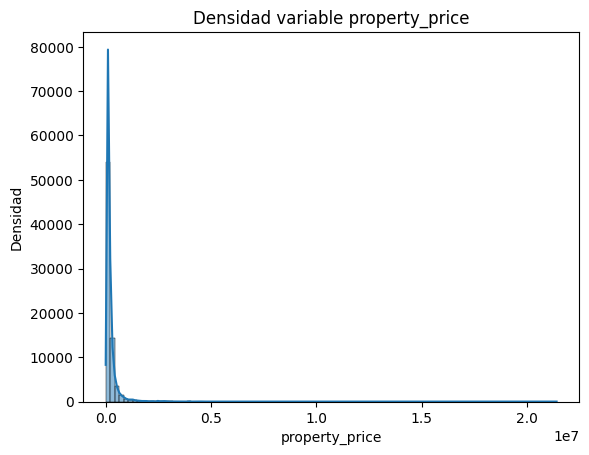

In [268]:
sns_hist=sns.histplot(data=viviendas_caba_train['property_price'], kde=True, alpha = 0.5, bins=100).set(title="Densidad variable property_price",xlabel="property_price",ylabel="Densidad")

podemos ver que hay precios muy elevados que se alejan de lo habitual

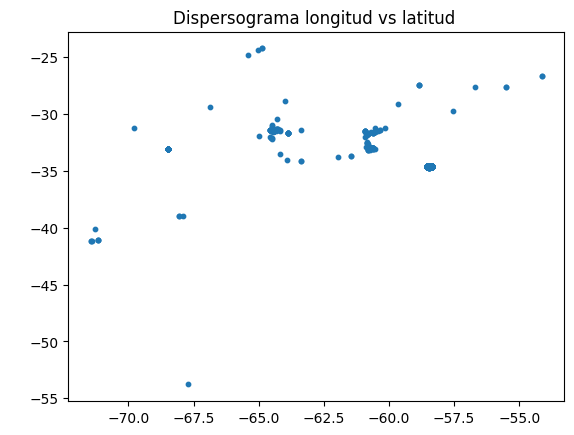

In [269]:
grf_long_lat=viviendas_caba_train.plot.scatter(x="longitud", y="latitud", s=10).set(title="Dispersograma longitud vs latitud ",xlabel='',ylabel=' ')

Aca ya podemos ver que hay puntos que no estan dentro de la lat y long de caba, es decir outliers que tendremos que procesar    

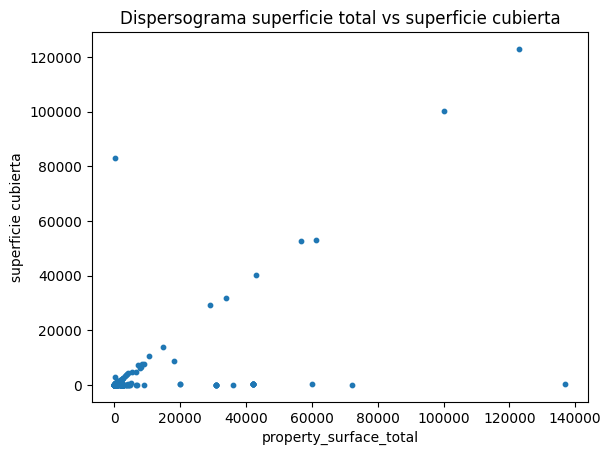

In [270]:
grf_sup=viviendas_caba_train.plot.scatter(x="property_surface_total", y="property_surface_covered", s=10).set(title="Dispersograma superficie total vs superficie cubierta",xlabel='property_surface_total',ylabel='superficie cubierta') 

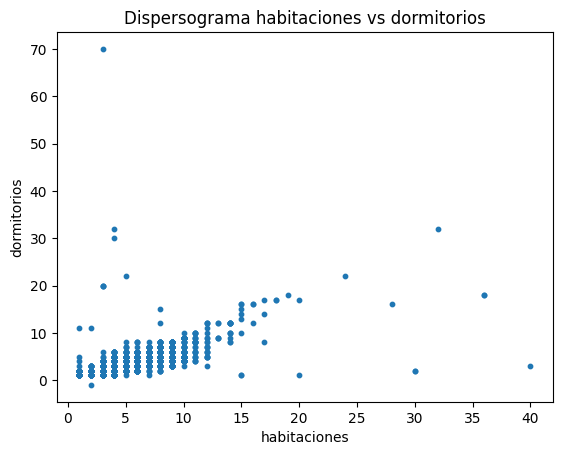

In [271]:
grf_dormitorios_por_habitaciones=viviendas_caba_train.plot.scatter(x="property_rooms", y="property_bedrooms", s=10).set(title="Dispersograma habitaciones vs dormitorios",xlabel='habitaciones',ylabel='dormitorios') 

vemos que hay algunos que todos los que estan por encima de la diagonal tienen mas dormitorios que habitaciones por lo que deben estar mal

##### Analizamos cantidad de valores posibles y frecuencias de las variables cualitativas

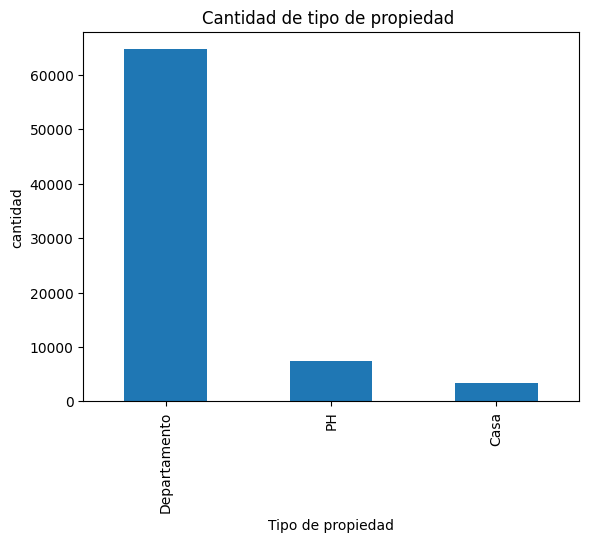

In [272]:
grf = viviendas_caba_train.property_type.value_counts().plot.bar( title="Cantidad de tipo de propiedad " , xlabel="Tipo de propiedad" , ylabel="cantidad")

 

<AxesSubplot:title={'center':'Cantidad de viviendas por barrio'}, xlabel='barrio', ylabel='cantidad'>

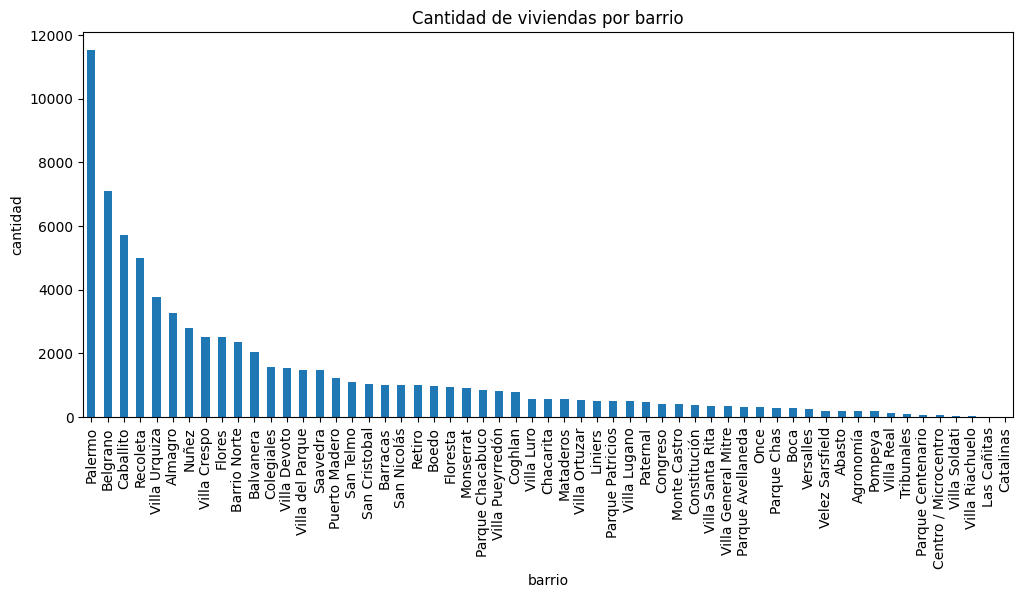

In [273]:
viviendas_caba_train.place_l3.value_counts().plot.bar(figsize=(12,5),title="Cantidad de viviendas por barrio" , xlabel="barrio" , ylabel="cantidad")

Hola:)

<AxesSubplot:title={'center':'Cantidad de viviendas por vecindario'}, xlabel='vecindario', ylabel='cantidad'>

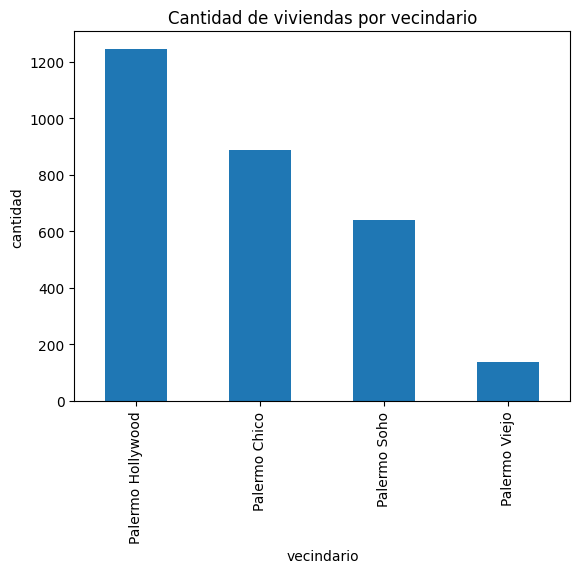

In [274]:
viviendas_caba_train.place_l4.value_counts().plot.bar(title="Cantidad de viviendas por vecindario" , xlabel="vecindario" , ylabel="cantidad")

Como solo palermo tiene vecindarios cargados tenemos que tomar una desicion. O los consideramos a todos como parlermo, o en veez de considerar 58 barrios consieramos 63 barrios y sacamos las vecindades y los metemos en los barrios.

In [275]:
viviendas_caba_train.property_title.value_counts()

Departamento - Palermo                                               1192
Departamento - Recoleta                                              1068
Departamento - Belgrano                                               886
Departamento - Caballito                                              736
Departamento - Almagro                                                539
                                                                     ... 
DEPARTAMENTO VENTA CABALLITO TRES AMBIENTES                             1
VENTA  DPTO 2 AMBIENTES ALMAGRO EDIFICIO C/ PILETA                      1
DEPARTAMENTO EN VENTA VILLA LUGANO                                      1
VENTA 3 AMBIENTES DEPARTAMENTO CABALLITO                                1
BELGRANO - 2 ambientes de 50m2 en edificio full amenities - VENTA       1
Name: property_title, Length: 46446, dtype: int64

##### Analizamos relacion entre algunas variables cualitativas con cuantitativas

<AxesSubplot:title={'center':'promedio de precios por barrio'}, xlabel='barrio', ylabel='promedio de precios'>

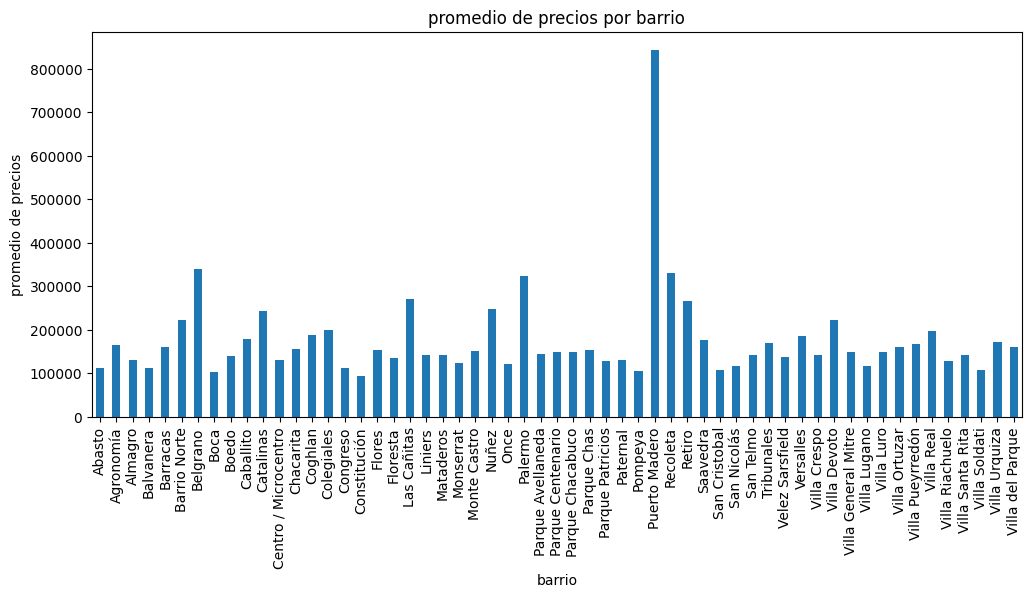

In [276]:
viviendas_caba_train.groupby('place_l3')['property_price'].mean().plot.bar(figsize=(12,5), title="promedio de precios por barrio" , xlabel="barrio" , ylabel="promedio de precios")

a simple vista pareciera que hay barrios mas caros que otros

<AxesSubplot:title={'center':'promedio de superficie total por por barrio'}, xlabel='barrio', ylabel='pormedio de superfiecie total'>

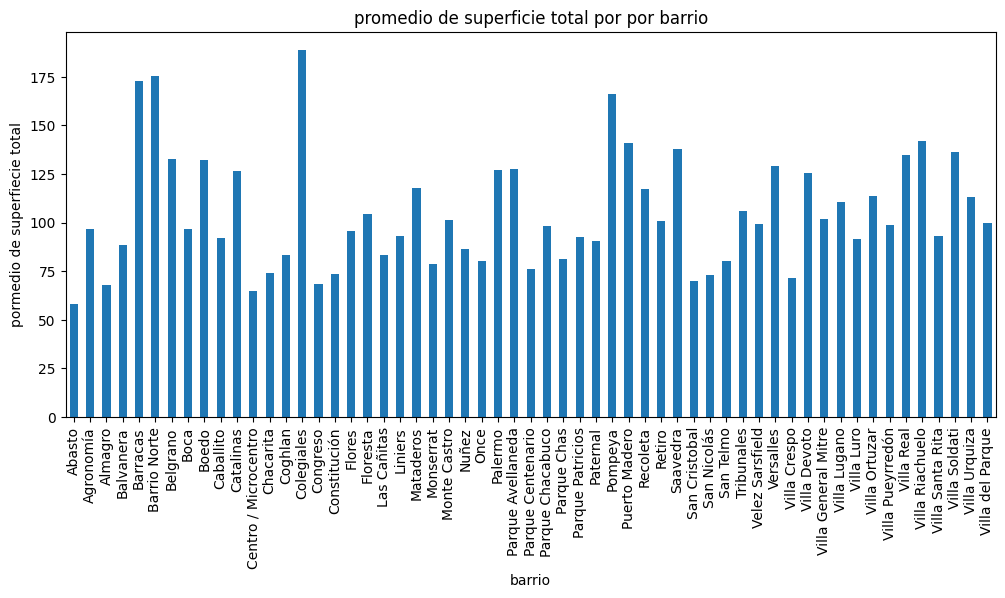

In [277]:
viviendas_caba_train.groupby('place_l3')['property_surface_total'].mean().plot.bar(figsize=(12,5), title="promedio de superficie total por por barrio" , xlabel="barrio" , ylabel="pormedio de superfiecie total")

vemos que en cuanto tama;o hjay una distribucion bastante pareja

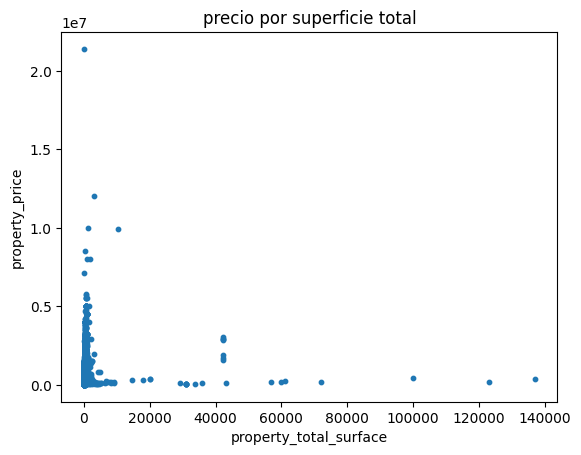

In [278]:
grf_precio_por_superficie=viviendas_caba_train.plot.scatter(x="property_surface_total", y="property_price", s=10).set(title="precio por superficie total",xlabel='property_total_surface',ylabel='property_price') 

Outliers no dejan sacar mucha info del grafico.

##### Correlacion entre variables

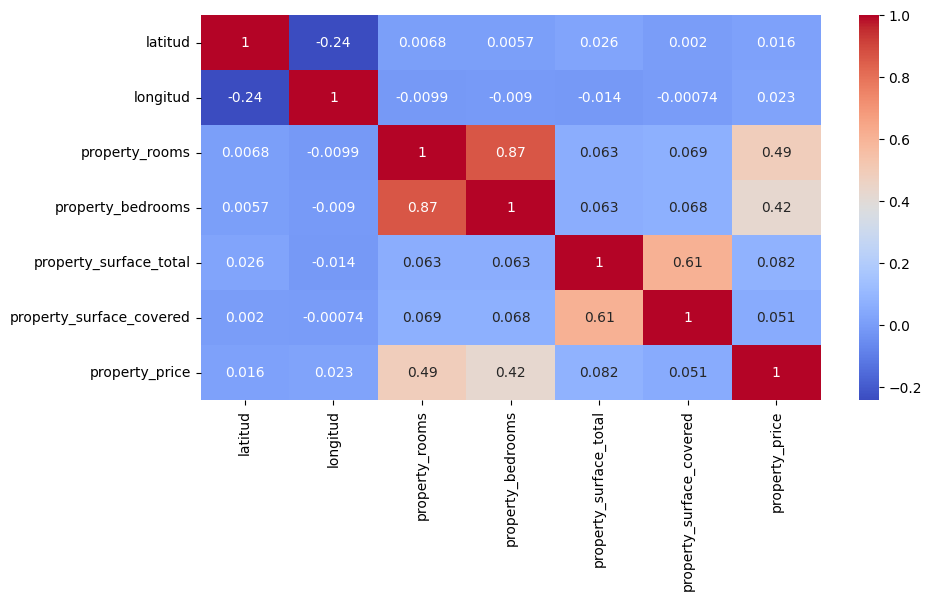

In [279]:
matriz_correlacion=viviendas_caba_train.corr()

plt.figure(figsize=(10,5))
sns.heatmap(matriz_correlacion, annot = True,cmap = 'coolwarm')
plt.show()

Despues de realiza el grafico de correlaciones, vemos que ademas de las relaciones obias, como cantidad de cuartos con cantidad de habitaciones y la superficie total con la superficie cubierta. Ademas podemos notar una leve correlacion entre el precio y la cantidad de habitaciones

##### Conlusiones generales del Análisis Exploratorio

Vendemos mayormente deptos, hay datos erroneos que estan por fuera de la lat y long de caba. 
Se suele vender propiedades con pocas habitaciones y a su vez que hay propiedades con mas dormitorios que habitaciones lo cual carece de sentido. 
Los barrios con mas propiedades en venta son Palermo, Belgrano y Caballito. En catalania se vende poco zona de oficina.
Hay propiedades con mucha mas superficie cubierta que total, es decir edificios.
Todos los graficos y conclusiones vistas hasta ahora, se ven afectadas por datos faltantes, redudantes y outliers.